# **Assignment 1**
```
Name: Omar Maged
ID:   18106717
```

## **Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset.tsv', sep='\t')
df.shape

(99999, 2)

In [ ]:
df.head()

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...


In [ ]:
df['label'].value_counts()

Positive    33333
Mixed       33333
Negative    33333
Name: label, dtype: int64

In [ ]:
positive_rows = df[df['label'] == 'Positive']
positive_head = positive_rows.head(n=3)
print(positive_head)

mixed_rows = df[df['label'] == 'Mixed']
mixed_head = mixed_rows.head(n=3)
print(mixed_head)

negative_rows = df[df['label'] == 'Negative']
negative_head = negative_rows.head(n=3)
print(negative_head)

      label                                               text
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2  Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
       label                                               text
33333  Mixed  مقبول. السرير مريح نوعا ما. حمام واحد فقط ف ال...
33334  Mixed  أول قراءة لي لغادة السمان، الكاتبة أوضحت أن مح...
33335  Mixed  رواية جيدة مختلفة عن النوع الذى عودنا احمد مرا...
          label                                               text
66666  Negative  لو كانت هذه الرواية تستحق النجوم الخمس؛ لانتقص...
66667  Negative  ضعيف جدا. قريب من الحرم ........ لكن يوجد طلعة...
66668  Negative  سيئه جدا . وجود بقاله ومغسله. المكيفات لاتعمل ...


In [ ]:
df['label_id'] = df['label'].map({'Negative': 0, 'Mixed': 1, 'Positive': 2})

In [ ]:
first_5 = df.head(5)
print("First 5 Positive rows:")
print(first_5)

after_33333 = df.iloc[33333:33338]
print("\nFirst 5 Mixed rows:")
print(after_33333)

after_66666 = df.iloc[66666:66671]
print("\nFirst 5 Negative rows:")
print(after_66666)


First 5 Positive rows:
      label                                               text  label_id
0  Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...         2
1  Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...         2
2  Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...         2
3  Positive  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...         2
4  Positive  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...         2

First 5 Mixed rows:
       label                                               text  label_id
33333  Mixed  مقبول. السرير مريح نوعا ما. حمام واحد فقط ف ال...         1
33334  Mixed  أول قراءة لي لغادة السمان، الكاتبة أوضحت أن مح...         1
33335  Mixed  رواية جيدة مختلفة عن النوع الذى عودنا احمد مرا...         1
33336  Mixed  جميلة وممتعة ، بس مش مهمة خالص. اول حاجة اقراه...         1
33337  Mixed  الثلاث نجمات لي أنا وليس للكتاب.. لأني ببساطة ...         1

First 5 Negative rows:
          label                                   

## **Data Pre-processing**

In [ ]:
!wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_twitter.zip

--2023-10-25 13:28:01--  https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_sg_300_twitter.zip
Resolving bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)... 108.61.0.122, 2001:19f0:0:22::100
Connecting to bakrianoo.ewr1.vultrobjects.com (bakrianoo.ewr1.vultrobjects.com)|108.61.0.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3322543144 (3.1G) [application/zip]
Saving to: ‘full_grams_sg_300_twitter.zip.1’

_twitter.zip.1        8%[>                   ] 273.69M  51.0MB/s    eta 59s    ^C


In [ ]:
!unzip "full_grams_sg_300_twitter.zip"

Archive:  full_grams_sg_300_twitter.zip
replace full_grams_sg_300_twitter.mdl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import gensim

In [ ]:
model = gensim.models.Word2Vec.load("/content/full_grams_sg_300_twitter.mdl")

In [ ]:
# === Reference ===========
# https://github.com/bakrianoo/aravec/blob/master/utilities.py
# =========================

# ==== Helper Methods =====
import re
import numpy as np
from nltk import ngrams

# Clean/Normalize Arabic Text
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']

    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)

    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    #trim
    text = text.strip()

    return text

In [ ]:
sentence = "مقبول. السرير مريح نوعا ما. حمام واحد فقط"
preprocessed_sentence = clean_str(sentence)

preprocessed_sentence

'مقبول السرير مريح نوعا ما حمام واحد فقط'

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import ISRIStemmer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

arabic_stop_words = set(stopwords.words('arabic'))
lemmatizer = ISRIStemmer()

def preprocess(text):

  cleaned_text = clean_str(text)

  words = word_tokenize(cleaned_text)

  filtered_sentence = []

  #Removing the Stop Words did not affect my accuracy much, so i commented it
  for word in words:
      if word not in arabic_stop_words:
        #lemmatized_word = lemmatizer.stem(word)
        #lemmatized_word = lemmatizer.suf32(word)
        filtered_sentence.append(word)

  return filtered_sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
arabic_text = "اللغة العربية هي إحدى أجمل اللغات في العالم. تتميز بتاريخ طويل وثري."

preprocessed_text = preprocess(arabic_text)
preprocessed_sentence = clean_str(sentence)

print(preprocessed_text)

['اللغه', 'العربيه', 'احدي', 'اجمل', 'اللغات', 'العالم', 'تتميز', 'بتاريخ', 'طويل', 'وثري']


In [ ]:
word_vector = model.wv[preprocessed_text]
word_vector.shape

(10, 300)

In [ ]:
model.wv.get_mean_vector(preprocessed_text).shape

(300,)

In [ ]:
#df['sentence_embedding'] = df['text'].apply(preprocess)

In [ ]:
def preprocess_and_vectorize(text):

  cleaned_text = clean_str(text)

  words = word_tokenize(cleaned_text)

  #filtered_sentence = []

  #Removing the Stop Words did not affect my accuracy much, so i commented it
  #for word in words:
      #if word not in arabic_stop_words:
       #lemmatized_word = lemmatizer.stem(word)
       #filtered_sentence.append(word)

  #if not filtered_sentence:
        #print(f"Empty filtered_sentence for text: {text}")
        # Return None for rows with empty 'filtered_sentence'
        #return None
  if not words:
        return None

  return model.wv.get_mean_vector(words)

In [ ]:
sentence = "اللغة العربية هي إحدى أجمل اللغات في العالم. تتميز بتاريخ طويل وثري."
preprocessed_sentence = preprocess_and_vectorize(sentence)

preprocessed_sentence.shape

(300,)

In [ ]:
df['sentence_embedding'] = df['text'].apply(preprocess_and_vectorize)

In [ ]:
# Filter out rows with 'None' values in 'sentence_embedding'
df = df[df['sentence_embedding'].notna()]

## **Model Training**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sentence_embedding'].values, df['label_id'], test_size=0.1, stratify=df['label_id'], random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89997,), (10000,), (89997,), (10000,))

In [ ]:
X_train = np.stack(X_train)
X_test =  np.stack(X_test)

In [ ]:
X_train.shape, X_test.shape

((89997, 300), (10000, 300))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
clfsgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
clfsgd.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [ ]:
from xgboost import XGBClassifier
clfxgb = XGBClassifier()
clfxgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_sgd = clfsgd.predict(X_test)
print(classification_report(y_test, y_pred_sgd, target_names = ['Negative', 'Positive', 'Mixed']))

y_pred_xgb = clfxgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb, target_names = ['Negative', 'Positive', 'Mixed']))

              precision    recall  f1-score   support

    Negative       0.64      0.69      0.66      3333
    Positive       0.55      0.44      0.49      3333
       Mixed       0.63      0.71      0.66      3334

    accuracy                           0.61     10000
   macro avg       0.60      0.61      0.60     10000
weighted avg       0.60      0.61      0.60     10000

              precision    recall  f1-score   support

    Negative       0.67      0.69      0.68      3333
    Positive       0.55      0.53      0.54      3333
       Mixed       0.68      0.67      0.68      3334

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



In [ ]:
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)
print("\nConfusion Matrix:")
print(conf_matrix_sgd)

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)


Confusion Matrix:
[[2287  632  414]
 [ 888 1458  987]
 [ 423  556 2355]]

Confusion Matrix:
[[2311  716  306]
 [ 793 1773  767]
 [ 340  744 2250]]


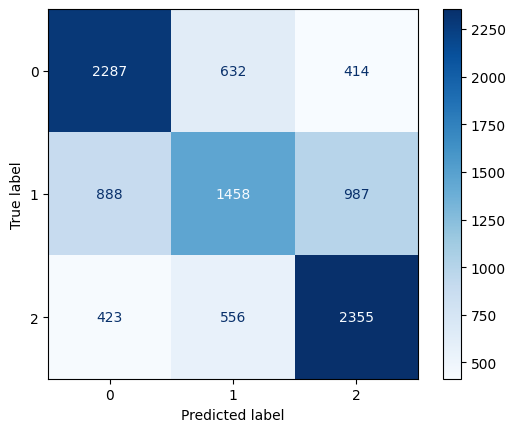

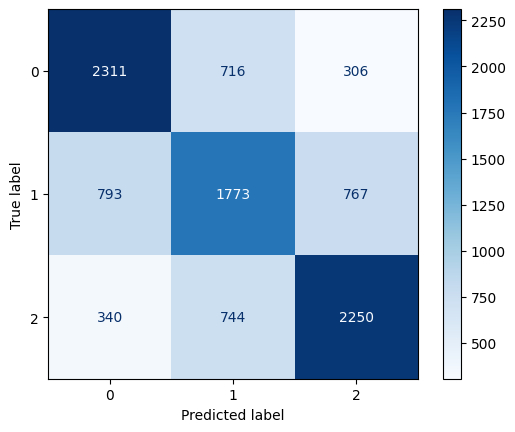

In [ ]:
labels = [0, 1, 2]

disp_conf_matrix_sgd = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sgd, display_labels=labels)
disp_conf_matrix_sgd.plot(cmap=plt.cm.Blues)
plt.show()

disp_conf_matrix_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=labels)
disp_conf_matrix_xgb.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
examples = ["لم يعجبني هذا المنتج، الجودة ضعيفة.", "هذا المنتج رائع وجودته ممتازة.",
            "بالرغم من السعر المنخفض، الجودة ممتازة ولكن التوصيل تأخر كثيرًا."]
vectors = [preprocess_and_vectorize(example) for example in examples]

In [ ]:
clfsgd.predict(vectors)

array([0, 2, 1])

In [ ]:
clfxgb.predict(vectors)

array([0, 2, 1])